<a href="https://colab.research.google.com/github/M-Pascal/Breast_Cancer_Diagnosis/blob/main/Summative_Intro_to_ml_%5BPascal_Mugisha%5D_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [373]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# All necessary libraries for training model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping


In [374]:
# Getting dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data


In [375]:
#TO DO: Load Data (Separate into: Train, Validation and test sets)

In [376]:
path = '/content/drive/MyDrive/Y3_T1/SUMMATIVE/dataset/data.csv'
df = pd.read_csv(path)

print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [377]:
# Dropping feature that are not usefull to the model
df = df.drop(['Unnamed: 32', 'id'], axis=1)

In [378]:
#  Checking for any missing values in the features
print("\nBasic Statistics:")
print(df.describe())

print("\nMissing Values:")
df.isnull().sum()


Basic Statistics:
       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [379]:
# Converting columns of diagnosis into binary Benign(B=0) or Malignant(M=1)
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

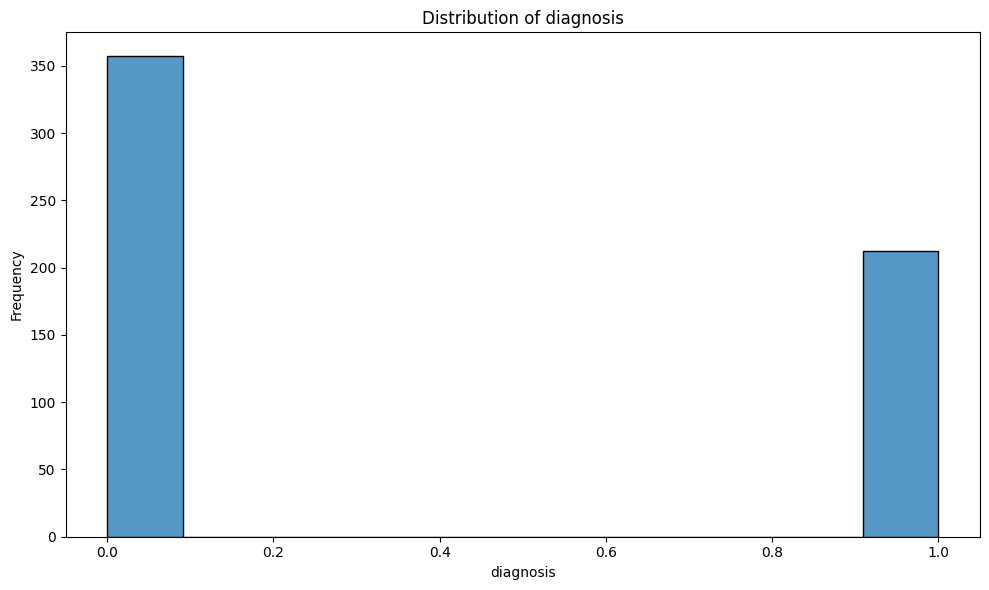

In [380]:
# # Displaying the distribution graph for only the first column
plt.figure(figsize=(10, 6))
sns.histplot(df[df.columns[0]])
plt.title(f'Distribution of {df.columns[0]}')
plt.xlabel(df.columns[0])
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# plt.figure(figsize=(15, 10))
# for i, column in enumerate(df.columns[:1], 1):
#     plt.subplot(2, 3, i)
#     sns.histplot(df[column])
#     plt.title(f'Distribution of {column}')
# plt.tight_layout()
# plt.show()

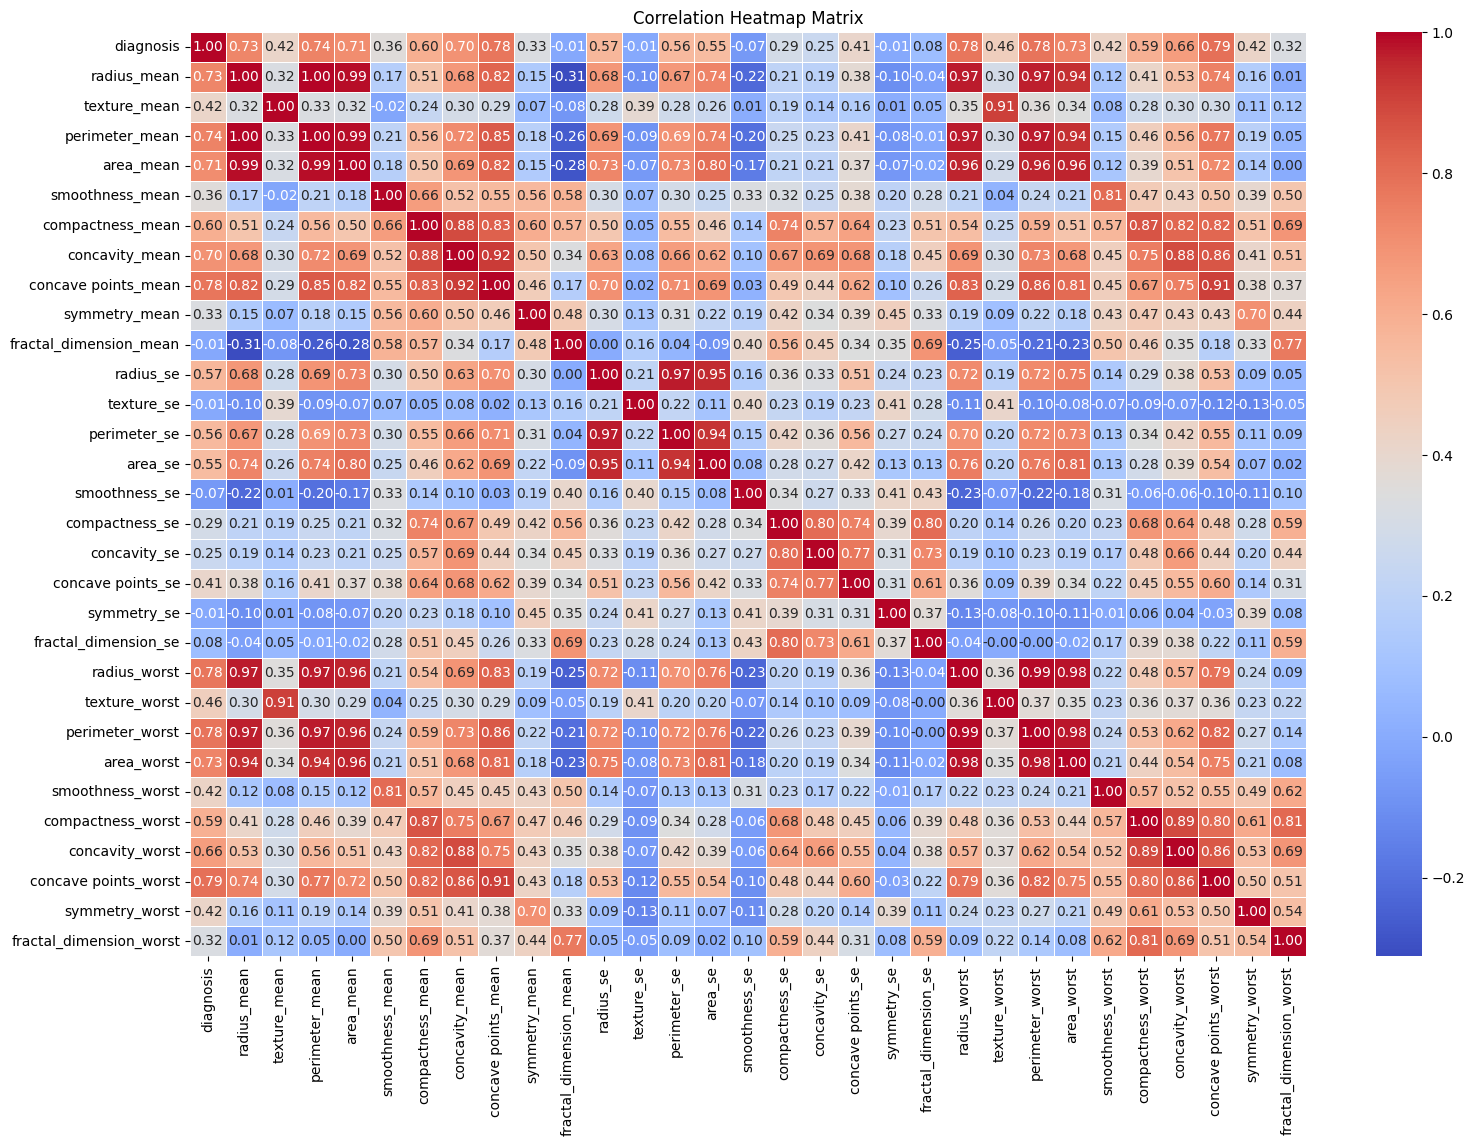

In [381]:
# Correlation matrix of all features
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap Matrix')
plt.show()

In [382]:
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [383]:
#Splitting the dataset into target and features
target = "diagnosis"
X = df.drop(target, axis=1)
y = df[target]

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (569, 30)
Shape of y: (569,)


In [384]:
# Standardsiding the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [385]:
# Split dataset (80% train, 10% validation, 10% test)
# First: split into 80% training and 20% (temporary set for validation & test in equal share)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Second: Split the 20% temporary set into 10% validation and 10% testing
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print dataset shape
print(f"Training data: {X_train.shape}")
print(f"Validation data: {X_val.shape}")
print(f"Testing data: {X_test.shape}")

Training data: (455, 30)
Validation data: (57, 30)
Testing data: (57, 30)


#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
> <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*v1ohAG82xmU6WGsG2hoE8g.png" alt="?" style="width:25px"/>




In [409]:
# Logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predictions on validation set
y_val_pred = model.predict(X_val)

# Model evaluation
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.9649
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.93      0.96        27

    accuracy                           0.96        57
   macro avg       0.97      0.96      0.96        57
weighted avg       0.97      0.96      0.96        57



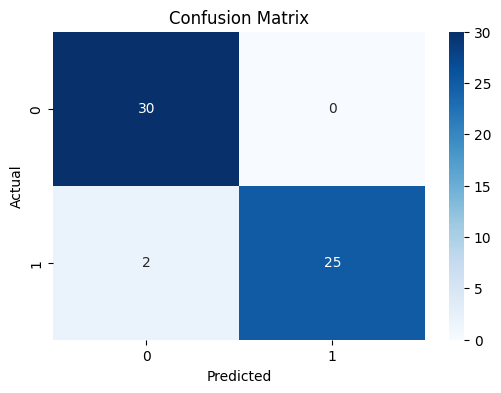

In [387]:
# Plotting confusion matrix for logistic regression
conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Task: Define a function that creates models without and With specified Optimization techniques


# Model without any Optimization Techniques

In [388]:
def Creating_model(X_train, y_train, X_val, y_val):
  # Model architecture
  model = Sequential([
      Input(shape=(X_train.shape[1],)), # Input layer
      Dense(64, activation='relu'), # Hidden Layer_1
      Dense(32, activation='relu'), # Hidden Layer_2
      Dense(16, activation='relu'), # Hidden Layer_3
      Dense(1, activation='sigmoid')
  ])

  # Compile the model without optimizer specifications
  model.compile(loss='binary_crossentropy', metrics=['accuracy'])

  # Train the model without specifying epochs or early stopping
  history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32)

  return model, history

# calling function
model, history = Creating_model(X_train, y_train, X_val, y_val)

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6051 - loss: 0.6385 - val_accuracy: 0.9298 - val_loss: 0.3974


In [389]:
# model summary
model.summary()

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_156 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_157 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_158 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_159 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,220 (36.02 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,611 (18.02 KB)

# Model with any Optimization Techniques

In [390]:
# Model with different optimization technique
def define_model(optimizer, regularization=None, reg_value=0.01, early_stopping=False, dropout=0.3, learning_rate=0.001, epochs=50):
    """
    Defines, compiles, and trains a model with customizable hyperparameters.
    """

    # Choose regularizer based on input
    if regularization == "l1":
        regularizer = l1(reg_value)
    elif regularization == "l2":
        regularizer = l2(reg_value)
    else:
        regularizer = None

    # Define the model architecture
    model_1 = Sequential([
        Input(shape=(X_train.shape[1],)),  # Input layer with defined shape
        Dense(64, activation='relu', kernel_regularizer=regularizer),
        Dropout(dropout),
        Dense(32, activation='relu', kernel_regularizer=regularizer),
        Dropout(dropout),
        Dense(16, activation='relu', kernel_regularizer=regularizer),
        Dropout(dropout),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    # Optimizer with learning rate selection based on the dictionary
    optimizers_dict = {
        "Adam": Adam(learning_rate=learning_rate),
        "SGD": SGD(learning_rate=learning_rate, momentum=0.9),
        "RMSprop": RMSprop(learning_rate=learning_rate)
    }

    if optimizer not in optimizers_dict:
        raise ValueError(f"Invalid optimizer '{optimizer}'. Choose from {list(optimizers_dict.keys())}")

    # Compile the model with the optimizer instance
    model_1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Define callbacks
    callbacks = []
    if early_stopping:
        callbacks.append(EarlyStopping(monitor='val_loss', verbose=1, patience=5))

    # Train the model
    history_1 = model_1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=32, callbacks=callbacks)

    return model_1, history_1

# Task: Print out the Final Model Accuracy and plot the Loss curve

In [391]:
# Plotting loss curve of the model
def loss_curve_plot(history):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training History - Model Instance 2')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [392]:
# Function that evaluate model function
def evaluate_model(model, X_test, y_test):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(f"\nAccuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return y_pred # Return y_pred to be used in confusion matrix

In [393]:
# plotting confusion matrix function
def plot_confusion_matrix(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)  # Using sklearn's function
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluation metric from model without any Optimization Technique

In [394]:
# Call evaluation function and get predictions
y_pred = evaluate_model(model, X_test, y_test)

# Call function to plot confusion matrix
plot_confusion_matrix(y_test, y_pred)

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.4754 - loss: 1.7588 - val_accuracy: 0.8596 - val_loss: 1.5395
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7058 - loss: 1.5609 - val_accuracy: 0.9123 - val_loss: 1.3749
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8157 - loss: 1.3961 - val_accuracy: 0.9123 - val_loss: 1.2283
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8912 - loss: 1.2529 - val_accuracy: 0.9649 - val_loss: 1.0967
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8967 - loss: 1.1226 - val_accuracy: 0.9474 - val_loss: 0.9909
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9043 - loss: 1.0289 - val_accuracy: 0.9474 - val_loss: 0.9055
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9265 - loss: 0.9561 - val_accuracy: 0.9474 - val_loss: 0.8377
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9611 - loss: 0.8733 - val_accuracy: 0.9649 - v

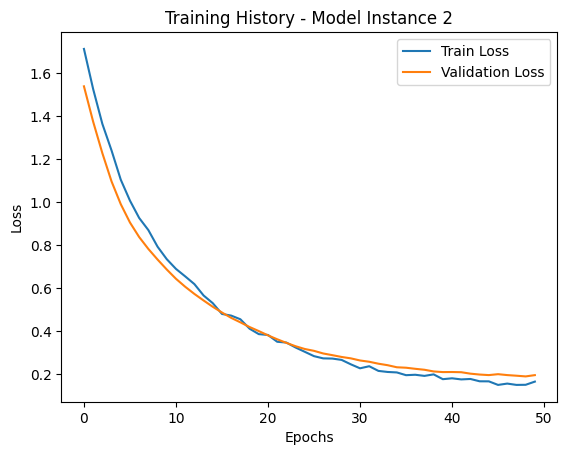

In [395]:
#TODO:
model_2, history_2 = define_model(optimizer="Adam",
                                  regularization="l2",
                                  reg_value=0.01,
                                  early_stopping=True,
                                  dropout=0.3,
                                  epochs=50)

loss_curve_plot(history_2)

In [396]:
# Model summary
model_2.summary()

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_160 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_87 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_161 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_88 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_162 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_89 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_163 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,829 (54.02 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,220 (36.02 KB)

Epoch 1/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.6384 - loss: 0.7706 - val_accuracy: 0.8070 - val_loss: 0.6463
Epoch 2/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7488 - loss: 0.6306 - val_accuracy: 0.8772 - val_loss: 0.5789
Epoch 3/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7643 - loss: 0.6269 - val_accuracy: 0.9298 - val_loss: 0.5266
Epoch 4/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7879 - loss: 0.5581 - val_accuracy: 0.9298 - val_loss: 0.4816
Epoch 5/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8321 - loss: 0.5206 - val_accuracy: 0.9298 - val_loss: 0.4445
Epoch 6/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8692 - loss: 0.4658 - val_accuracy: 0.9298 - val_loss: 0.4138
Epoch 7/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8684 - loss: 0.4582 - val_accuracy: 0.9298 - val_loss: 0.3879
Epoch 8/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8650 - loss: 0.4614 - val_accuracy: 0.9298 - val_los

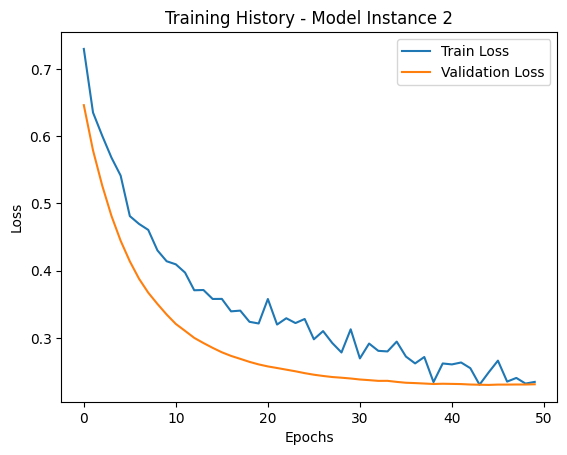

In [398]:
#TODO:
model_3, history_3 = define_model(optimizer="SGD",
                                  regularization="l2",
                                  reg_value=0.001,
                                  early_stopping=True,
                                  dropout=0.3,
                                  epochs=70)
loss_curve_plot(history_3)
#print out confusion matrix and error analysis metrics after the cell

In [399]:
# Model summary
model_3.summary()

Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_168 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_93 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_169 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_94 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_170 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_95 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_171 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,611 (18.02 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6659 - loss: 0.9557 - val_accuracy: 0.9298 - val_loss: 0.7226
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8296 - loss: 0.7286 - val_accuracy: 0.9474 - val_loss: 0.5912
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8456 - loss: 0.6195 - val_accuracy: 0.9474 - val_loss: 0.5108
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9108 - loss: 0.5241 - val_accuracy: 0.9474 - val_loss: 0.4435
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9167 - loss: 0.4908 - val_accuracy: 0.9474 - val_loss: 0.4085
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9342 - loss: 0.4698 - val_accuracy: 0.9474 - val_loss: 0.3863
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.4119 - val_accuracy: 0.9298 - val_loss: 0.3707
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9673 - loss: 0.3822 - val_accuracy: 0.9298 -

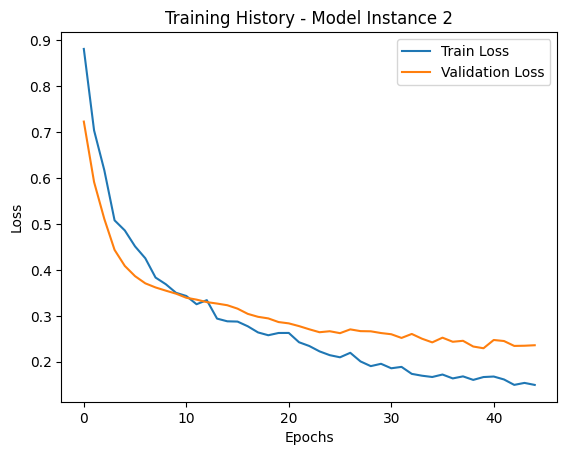

In [401]:
#TODO:
model_4, history_4 = define_model(optimizer="RMSprop",
                                  regularization="l1",
                                  reg_value=0.0005,
                                  early_stopping=True,
                                  dropout=0.2,
                                  epochs=100)
loss_curve_plot(history_4)
#print out confusion matrix and error analysis metrics after the cell

In [402]:
# Model summary
model_4.summary()

Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_176 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_99 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_177 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_100 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_178 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_101 (Dropout)                │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_179 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,220 (36.02 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,611 (18.02 KB)

#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.94      1.00      0.97        16

    accuracy                           0.98        57
   macro avg       0.97      0.99      0.98        57
weighted avg       0.98      0.98      0.98        57

Confusion Matrix:
 [[40  1]
 [ 0 16]]

Accuracy: 0.9825
Precision: 0.9412
Recall: 1.0000
F1 Score: 0.9697


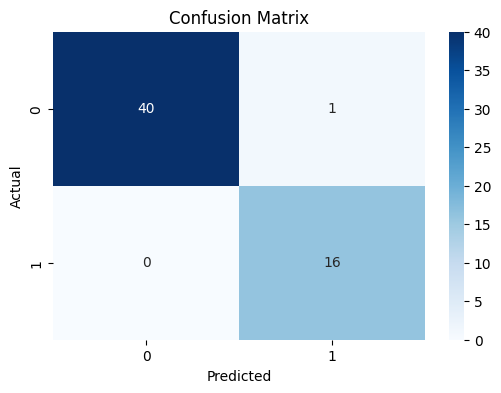

In [403]:
#print confusion matrix and error analysis metrics after loss evaluation
evaluate_model(model_2, X_test, y_test)

plot_confusion_matrix(y_test, y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        16

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57

Confusion Matrix:
 [[41  0]
 [ 0 16]]

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


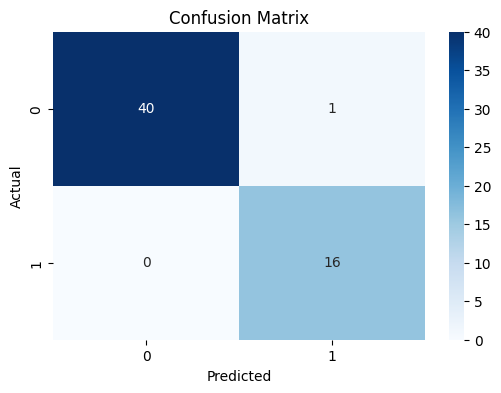

In [404]:
#print confusion matrix and error analysis metrics after loss evaluation
evaluate_model(model_3, X_test, y_test)

plot_confusion_matrix(y_test, y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.94      1.00      0.97        16

    accuracy                           0.98        57
   macro avg       0.97      0.99      0.98        57
weighted avg       0.98      0.98      0.98        57

Confusion Matrix:
 [[40  1]
 [ 0 16]]

Accuracy: 0.9825
Precision: 0.9412
Recall: 1.0000
F1 Score: 0.9697


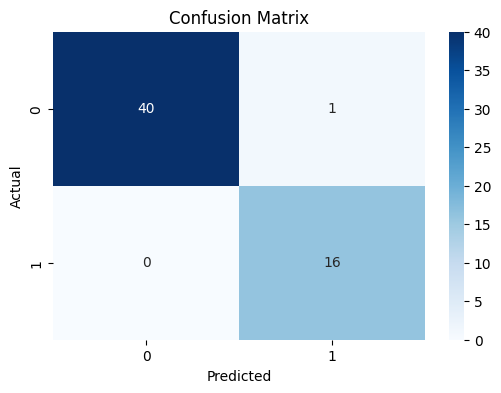

In [405]:
# Print confusion matrix and error analysis metrics after loss evaluation
evaluate_model(model_4, X_test, y_test)

plot_confusion_matrix(y_test, y_pred)

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [413]:
# Saving all the models within directory
import os
import pickle

def save_model(model, filename, directory='saved_models'):
    """
    Save the model to a specified directory.
    """

    # Create the directory if it doesn't exist
    os.makedirs(directory, exist_ok=True)

    # Construct the full file path
    file_path = os.path.join(directory, filename)

    # Save the model to a file.
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model saved to {filename}")

save_model(model, 'model_1(Logistic_regression).pkl')

Model saved to model_1(Logistic_regression).pkl


In [407]:
# model_path = None
# make_predictions(None)

Congratulations!!
